<a href="https://colab.research.google.com/github/sultanardian/kuliah/blob/main/machine%20learning/Machine_Learning_A_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
DIR = '/content/drive/MyDrive/rps-cv-images'
CATS = ['paper', 'rock', 'scissors']

asset = []
IMG_RESIZE = 100

def image_load():
    for category in CATS:
        path = os.path.join(DIR, category)
        idx = CATS.index(category)

        for img in os.listdir(path):
            img_read = cv2.imread(os.path.join(path, img))
            img_resize = cv2.resize(img_read, (IMG_RESIZE, IMG_RESIZE))

            asset.append([img_resize, idx])

In [ ]:
image_load()

In [ ]:
asset[20][0].shape

(100, 100, 3)

In [ ]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs)
    Display data as an image; i.e. on a 2D regular raster.
    
    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. Note: For actually displaying
    a grayscale image set up the color mapping using the parameters
    ``cmap='gray', vmin=0, vmax=255``.
    
    Parameters
    ----------
    X : array-like or PIL image
        The image data. Supported array shapes are:
    
        - (M, N): an image with scalar data. The values are mapped to
          colors using normalization and a colormap. See parameters *norm*,
          *cmap*, *vmin*, *vmax*.
        - (M, N, 3): an image with RGB values (0-1 float or 

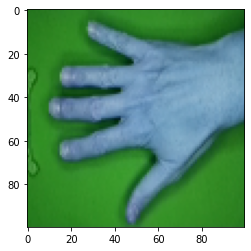

In [ ]:
plt.imshow(asset[20][0])

In [ ]:
X = []
y = []

for feats, labels in asset:
    X.append(feats)
    y.append(labels)

X = np.array(X).reshape(-1, IMG_RESIZE, IMG_RESIZE, 3)
y = np.array(y).astype('float32').reshape(-1, 1)

In [ ]:
X[0].shape

(100, 100, 3)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [ ]:
y_train

array([[2.],
       [2.],
       [2.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
np.asarray(y_train).astype('float32').reshape((-1,1))

array([[2.],
       [2.],
       [2.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
X = X/225.0

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 32, validation_split = 0.2, epochs = 10)

Epoch 1/10
35/35 [==============================] - 19s 526ms/step - loss: 1081.5905 - accuracy: 0.3172 - val_loss: -3716.3877 - val_accuracy: 0.3226
Epoch 2/10
35/35 [==============================] - 18s 523ms/step - loss: -11750.8330 - accuracy: 0.3217 - val_loss: -105281.0156 - val_accuracy: 0.3226
Epoch 3/10
35/35 [==============================] - 18s 519ms/step - loss: -388748.3750 - accuracy: 0.3297 - val_loss: -3002024.5000 - val_accuracy: 0.3226
Epoch 4/10
35/35 [==============================] - 18s 516ms/step - loss: -6418435.5000 - accuracy: 0.3226 - val_loss: -29392184.0000 - val_accuracy: 0.3226
Epoch 5/10
35/35 [==============================] - 18s 514ms/step - loss: -39272140.0000 - accuracy: 0.3217 - val_loss: -129785016.0000 - val_accuracy: 0.3226
Epoch 6/10
35/35 [==============================] - 18s 512ms/step - loss: -172045104.0000 - accuracy: 0.3226 - val_loss: -566437056.0000 - val_accuracy: 0.3226
Epoch 7/10
35/35 [==============================] - 18s 507ms